https://www.kaggle.com/code/adepvenugopal/predicting-diamond-prices-using-knn-regression/data?select=diamonds.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("diamonds.csv")

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
len(df['price'].unique())

11602

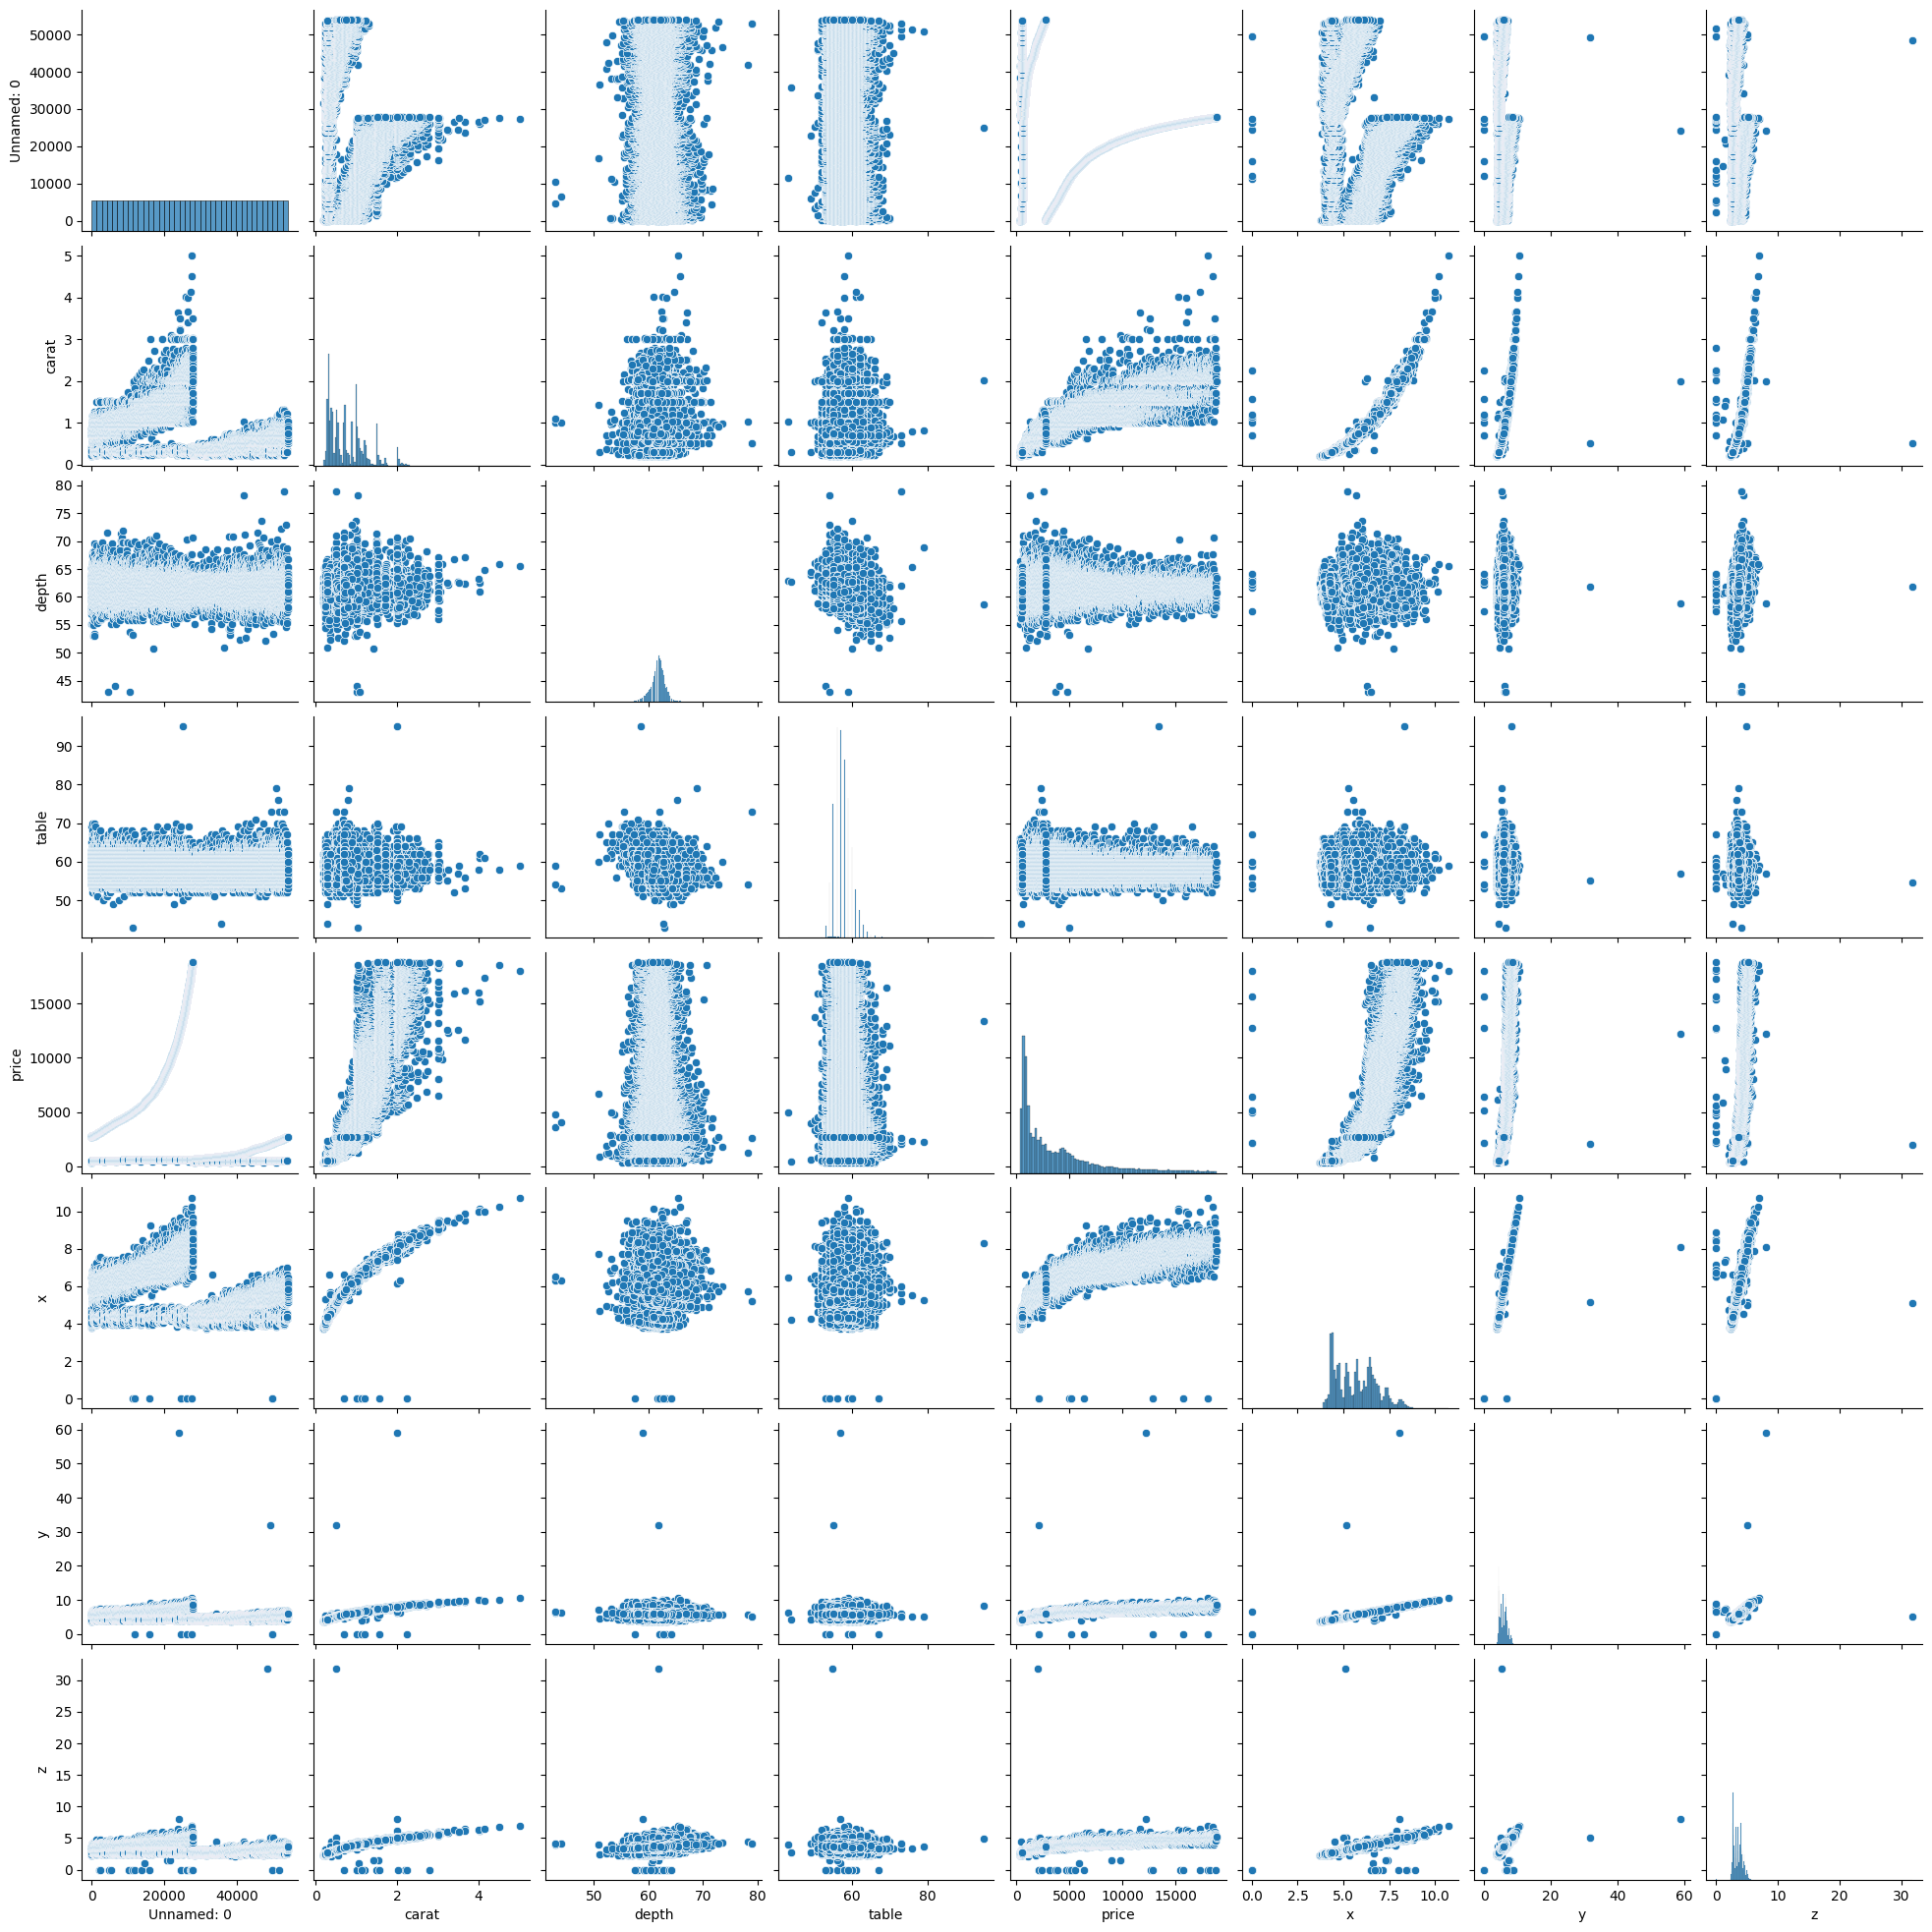

In [6]:
sns.pairplot(df)

## Feature Engineering

In [7]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [8]:
dict={
    'Ideal':0, 'Premium':1, 'Good':2, 'Very Good':3, 'Fair':4
}
df['cut'] = df.cut.map(dict)

In [9]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [10]:
dict={
    'E':0, 'I':1, 'J':2, 'H':3, 'F':4, 'G':5, 'D':6
}
df['color'] = df.color.map(dict)

In [11]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [12]:
dict={
    'SI2':0, 'SI1':1, 'VS1':2, 'VS2':3, 'VVS2':4, 'VVS1':5, 'I1':6, 'IF':7
}
df['clarity'] = df.clarity.map(dict)

In [13]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,0,0,0,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,1,0,1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,2,0,2,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,1,1,3,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,2,2,0,63.3,58.0,335,4.34,4.35,2.75


## Spliting of data

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x=df.drop(['price'],axis=1)
y=df['price']

In [16]:
x_train ,x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
x_train.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z
26546,26547,2.01,2,4,0,58.1,64.0,8.23,8.19,4.77
9159,9160,1.01,3,0,0,60.0,60.0,6.57,6.49,3.92
14131,14132,1.10,1,3,3,62.5,58.0,6.59,6.54,4.10
15757,15758,1.50,2,0,0,61.5,65.0,7.21,7.17,4.42
24632,24633,1.52,3,5,2,62.1,57.0,7.27,7.32,4.53


In [18]:
y_train.head()

26546    16231
9159      4540
14131     5729
15757     6300
24632    12968
Name: price, dtype: int64

## K Nearest Regressor

In [19]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

In [20]:
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
print(r2_score(pred,y_test))

0.995336604727081


## K Nearest Regressor parameters tuning using GridSearchCV

In [21]:
from sklearn.model_selection import GridSearchCV

In [24]:
params = {
    'n_neighbors' : range(5,15),
    'algorithm' : ['auto'],
    'p' : [1,2,3],
    'n_jobs' :[-1]
}
knn = KNeighborsRegressor()
gs_knn = GridSearchCV(knn , param_grid = params , cv =5 , scoring = 'r2',verbose=2)

In [25]:
gs_knn.fit(x_train , y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END ......algorithm=auto, n_jobs=-1, n_neighbors=5, p=1; total time=   3.7s
[CV] END ......algorithm=auto, n_jobs=-1, n_neighbors=5, p=1; total time=   0.1s
[CV] END ......algorithm=auto, n_jobs=-1, n_neighbors=5, p=1; total time=   0.1s
[CV] END ......algorithm=auto, n_jobs=-1, n_neighbors=5, p=1; total time=   0.1s
[CV] END ......algorithm=auto, n_jobs=-1, n_neighbors=5, p=1; total time=   0.1s
[CV] END ......algorithm=auto, n_jobs=-1, n_neighbors=5, p=2; total time=   0.1s
[CV] END ......algorithm=auto, n_jobs=-1, n_neighbors=5, p=2; total time=   0.1s
[CV] END ......algorithm=auto, n_jobs=-1, n_neighbors=5, p=2; total time=   0.1s
[CV] END ......algorithm=auto, n_jobs=-1, n_neighbors=5, p=2; total time=   0.1s
[CV] END ......algorithm=auto, n_jobs=-1, n_neighbors=5, p=2; total time=   0.1s
[CV] END ......algorithm=auto, n_jobs=-1, n_neighbors=5, p=3; total time=   0.1s
[CV] END ......algorithm=auto, n_jobs=-1, n_nei

[CV] END .....algorithm=auto, n_jobs=-1, n_neighbors=11, p=3; total time=   0.1s
[CV] END .....algorithm=auto, n_jobs=-1, n_neighbors=11, p=3; total time=   0.1s
[CV] END .....algorithm=auto, n_jobs=-1, n_neighbors=11, p=3; total time=   0.1s
[CV] END .....algorithm=auto, n_jobs=-1, n_neighbors=11, p=3; total time=   0.1s
[CV] END .....algorithm=auto, n_jobs=-1, n_neighbors=12, p=1; total time=   0.1s
[CV] END .....algorithm=auto, n_jobs=-1, n_neighbors=12, p=1; total time=   0.1s
[CV] END .....algorithm=auto, n_jobs=-1, n_neighbors=12, p=1; total time=   0.1s
[CV] END .....algorithm=auto, n_jobs=-1, n_neighbors=12, p=1; total time=   0.1s
[CV] END .....algorithm=auto, n_jobs=-1, n_neighbors=12, p=1; total time=   0.1s
[CV] END .....algorithm=auto, n_jobs=-1, n_neighbors=12, p=2; total time=   0.1s
[CV] END .....algorithm=auto, n_jobs=-1, n_neighbors=12, p=2; total time=   0.1s
[CV] END .....algorithm=auto, n_jobs=-1, n_neighbors=12, p=2; total time=   0.1s
[CV] END .....algorithm=auto

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto'], 'n_jobs': [-1],
                         'n_neighbors': range(5, 15), 'p': [1, 2, 3]},
             scoring='r2', verbose=2)

In [26]:
print(gs_knn.best_score_)

0.9980035140103137


In [27]:
print(gs_knn.best_params_)

{'algorithm': 'auto', 'n_jobs': -1, 'n_neighbors': 5, 'p': 1}
